In [1]:
import lightning as L
import pandas as pd
import torch
from lightning import seed_everything
from lightning.pytorch.callbacks import ModelPruning
from lightning.pytorch.tuner import Tuner
from matplotlib import pyplot as plt

from src.module import ResNet, ResidualBlock
from src.utils import calculate_sparsity

seed_everything(42, workers=True)

%matplotlib inline

Seed set to 42


### Training with LearningRateFinder.

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_default_device(device)

In [3]:
model = ResNet(block=ResidualBlock, layers=[3, 4, 6, 3], device=device.type, prune=True)
model.to(device)
model

ResNet(
  (loss): CrossEntropyLoss()
  (accuracy): MulticlassAccuracy()
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\aksid\PycharmProjects\MNISTClassifier\venv\lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 4080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.0007585775750291836
Restoring states from the checkpoint path at C:\Users\aksid\PycharmProjects\MNISTClassifier\.lr_find_c837792e-2341-4163-94b5-42dad53b38a0.ckpt
Restored all states from the checkpoint at C:\Users\aksid\PycharmProjects\MNISTClassifier\.lr_find_c837792e-2341-4163-94b5-42dad53b38a0.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name     | Type               | Params
-------------------------------------------------
0  | loss     | CrossEntropyLoss   | 0     
1  | accuracy | MulticlassAccuracy | 0     
2  | conv1    | Conv2d             | 3.1 K 
3  | bn1      | BatchNorm2d        | 128   
4  | relu     | ReLU               | 0     
5  | maxpool  | MaxPool2d          | 0     
6  | layer1   | Sequential         | 221 K 
7  | layer2   | Sequential         | 1.1 M 
8  | layer3   | Sequential         | 6.8 M 
9  | layer4   | Sequential         | 13.1 M
10 | avgpool  | AdaptiveAvgPool2d  | 0     
11 |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name     | Type               | Params
-------------------------------------------------
0  | loss     | CrossEntropyLoss   | 0     
1  | accuracy | MulticlassAccuracy | 0     
2  | conv1    | Conv2d             | 3.1 K 
3  | bn1      | BatchNorm2d        | 128   
4  | relu     | ReLU               | 0     
5  | maxpool  | MaxPool2d          | 0     
6  | layer1   | Sequential         | 221 K 
7  | layer2   | Sequential         | 1.1 M 
8  | layer3   | Sequential         | 6.8 M 
9  | layer4   | Sequential         | 13.1 M
10 | avgpool  | AdaptiveAvgPool2d  | 0     
11 | fc       | Linear             | 5.1 K 
-------------------------------------------------
21.3 M    Trainable params
0         Non-trainable params
21.3 M    Total params
85.1

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 0/21305684 (0.00%) -> 1064176/21305684 (4.99%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 1064176/21305684 (4.99%) -> 2075136/21305684 (9.74%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 2075136/21305684 (9.74%) -> 3035577/21305684 (14.25%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 3035577/21305684 (14.25%) -> 3947985/21305684 (18.53%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 3947985/21305684 (18.53%) -> 4814755/21305684 (22.60%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 4814755/21305684 (22.60%) -> 5638195/21305684 (26.46%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 5638195/21305684 (26.46%) -> 6420459/21305684 (30.13%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 6420459/21305684 (30.13%) -> 7163607/21305684 (33.62%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 7163607/21305684 (33.62%) -> 7869583/21305684 (36.94%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 7869583/21305684 (36.94%) -> 8540279/21305684 (40.08%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 8540279/21305684 (40.08%) -> 9177444/21305684 (43.08%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 9177444/21305684 (43.08%) -> 9782758/21305684 (45.92%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 9782758/21305684 (45.92%) -> 10357800/21305684 (48.62%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 10357800/21305684 (48.62%) -> 10904092/21305684 (51.18%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 10904092/21305684 (51.18%) -> 11423055/21305684 (53.62%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 11423055/21305684 (53.62%) -> 11916079/21305684 (55.93%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 11916079/21305684 (55.93%) -> 12384457/21305684 (58.13%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 12384457/21305684 (58.13%) -> 12829414/21305684 (60.22%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 12829414/21305684 (60.22%) -> 13252110/21305684 (62.20%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 13252110/21305684 (62.20%) -> 13653683/21305684 (64.08%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 13653683/21305684 (64.08%) -> 14035176/21305684 (65.88%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 14035176/21305684 (65.88%) -> 14397589/21305684 (67.58%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 14397589/21305684 (67.58%) -> 14741870/21305684 (69.19%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 14741870/21305684 (69.19%) -> 15068948/21305684 (70.73%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 15068948/21305684 (70.73%) -> 15379677/21305684 (72.19%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 15379677/21305684 (72.19%) -> 15674876/21305684 (73.57%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 15674876/21305684 (73.57%) -> 15955316/21305684 (74.89%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 15955316/21305684 (74.89%) -> 16221726/21305684 (76.14%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 16221726/21305684 (76.14%) -> 16474822/21305684 (77.33%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 16474822/21305684 (77.33%) -> 16715255/21305684 (78.45%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 16715255/21305684 (78.45%) -> 16943681/21305684 (79.53%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 16943681/21305684 (79.53%) -> 17160675/21305684 (80.55%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 17160675/21305684 (80.55%) -> 17366807/21305684 (81.51%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 17366807/21305684 (81.51%) -> 17562641/21305684 (82.43%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 17562641/21305684 (82.43%) -> 17748663/21305684 (83.30%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 17748663/21305684 (83.30%) -> 17925384/21305684 (84.13%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 17925384/21305684 (84.13%) -> 18093277/21305684 (84.92%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 18093277/21305684 (84.92%) -> 18252779/21305684 (85.67%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 18252779/21305684 (85.67%) -> 18404318/21305684 (86.38%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 18404318/21305684 (86.38%) -> 18548265/21305684 (87.06%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 18548265/21305684 (87.06%) -> 18685033/21305684 (87.70%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 18685033/21305684 (87.70%) -> 18814956/21305684 (88.31%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 18814956/21305684 (88.31%) -> 18938366/21305684 (88.89%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 18938366/21305684 (88.89%) -> 19055616/21305684 (89.44%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 19055616/21305684 (89.44%) -> 19167008/21305684 (89.96%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 19167008/21305684 (89.96%) -> 19272831/21305684 (90.46%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 19272831/21305684 (90.46%) -> 19373357/21305684 (90.93%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 19373357/21305684 (90.93%) -> 19468849/21305684 (91.38%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 19468849/21305684 (91.38%) -> 19559556/21305684 (91.80%)


Validation: |          | 0/? [00:00<?, ?it/s]

Applied `l1_unstructured`. Pruned: 19559556/21305684 (91.80%) -> 19645738/21305684 (92.21%)
`Trainer.fit` stopped: `max_epochs=50` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8443999886512756     │
│         test_loss         │    0.44882017374038696    │
└───────────────────────────┴───────────────────────────┘

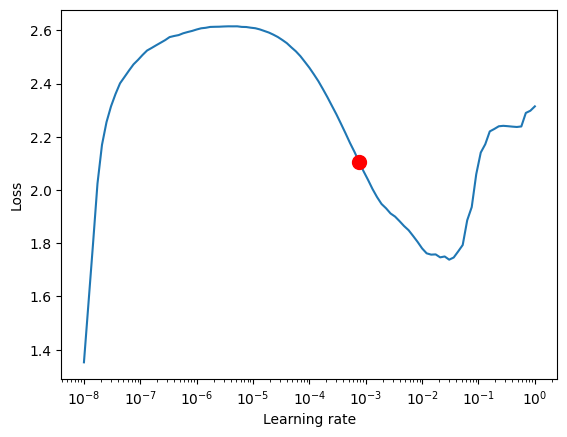

In [4]:
from lightning.pytorch.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    dirpath="./",
    filename="best_model",
    monitor="val_acc",
    mode="max",
    save_top_k=1,
    verbose=False,
)

# Define the ModelPruning callback
pruning_callback = ModelPruning(
    pruning_fn="l1_unstructured",
    parameter_names=['weight', 'bias'],
    amount=0.05,
    verbose=1,  # Set verbosity level
    use_global_unstructured=False,
)

# Create the Trainer with the ModelCheckpoint callback
trainer = L.Trainer(
    max_epochs=15,
    callbacks=[checkpoint_callback],
    log_every_n_steps=1000,
)

tuner = Tuner(trainer)

lr_finder = tuner.lr_find(model)

lr_finder.plot(suggest=True)

del lr_finder, tuner

# Train the model without pruning
trainer.fit(model)

# Load the best model checkpoint
best_model_path = checkpoint_callback.best_model_path
model = ResNet.load_from_checkpoint(best_model_path)

# Create a new Trainer with the ModelPruning callback
pruning_trainer = L.Trainer(
    max_epochs=50,  # Adjust the number of epochs for fine-tuning after pruning
    callbacks=[pruning_callback],
    log_every_n_steps=1000,
)

# Fine-tune the model with pruning
pruning_trainer.fit(model)

res = pruning_trainer.test(model)

In [5]:
res

[{'test_loss': 0.44882017374038696, 'test_acc': 0.8443999886512756}]

### Check sparsity for pruning

In [6]:
calculate_sparsity(model)  # it's from pruned model! 

0.9230488538742065

In [7]:
model = ResNet.load_from_checkpoint('mnist.model')
model.eval()
calculate_sparsity(model)

1.4095405731495703e-07

### There are metrix and recorded as pruning amount 0 to 99 percent.
let's look at that.

In [10]:
df = pd.read_csv('lightning_logs/version_3/metrics.csv')

df = df[['epoch', 'val_acc']]

df.dropna(inplace=True)
df

,epoch,val_acc
0,0,0.9706
2,1,0.9810
4,2,0.9785
6,3,0.9796
8,4,0.9776
10,5,0.9829
12,6,0.9820
14,7,0.9814
16,8,0.9840
18,9,0.9826


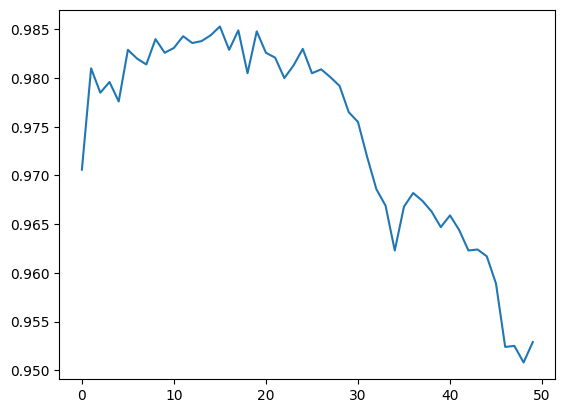

In [11]:
plt.plot(df['epoch'], df['val_acc'])

### The performance was not very dropped.

In [12]:
# save the pruned model.
pruning_trainer.save_checkpoint('mnist_pruning.model')

In [13]:
del model, pruning_trainer, trainer, df

In [14]:
model = ResNet.load_from_checkpoint('mnist_pruning.model')
model.eval()

0.9230488538742065

In [16]:
test_trainer = L.Trainer(
    max_epochs=50,  # Adjust the number of epochs for fine-tuning after pruning
    callbacks=[pruning_callback],
    log_every_n_steps=1000,
)

test_trainer.test(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8443999886512756     │
│         test_loss         │    0.44882017374038696    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.44882017374038696, 'test_acc': 0.8443999886512756}]

In [17]:
calculate_sparsity(model)

0.9230488538742065